<a href="https://www.kaggle.com/code/srabontideb/superstore-sales?scriptVersionId=233023586" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd

# Load dataset
data = pd.read_csv('/kaggle/input/sales-forecasting/train.csv')

# Preview the data
print(data.head())
print(data.info())
print(data.describe())


   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Cat

In [2]:
data.isnull().sum()


Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [3]:
# Remove rows with any missing values
data.dropna(inplace=True)


In [4]:
duplicates = data.duplicated(subset=['Order ID']).sum()
print(f'Duplicates: {duplicates}')

Duplicates: 4873


In [5]:
# Remove duplicates
data.drop_duplicates(subset=['Order ID'], inplace=True)

In [6]:
# Convert date columns
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d/%m/%Y')
data['Ship Date'] = pd.to_datetime(data['Ship Date'], format='%d/%m/%Y')


# Check types
print(data.dtypes)


Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
dtype: object


In [7]:
data['Category'] = data['Category'].str.strip().str.title()


In [8]:
print(data.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')


In [9]:
# Remove extra spaces from column names
data.columns = data.columns.str.strip()


In [10]:
# Filter data to include only positive sales values
data = data[data['Sales'] > 0]


count     4916.000000
mean       218.899723
std        552.008416
min          0.556000
25%         16.237500
50%         51.485000
75%        200.294000
max      11199.968000
Name: Sales, dtype: float64


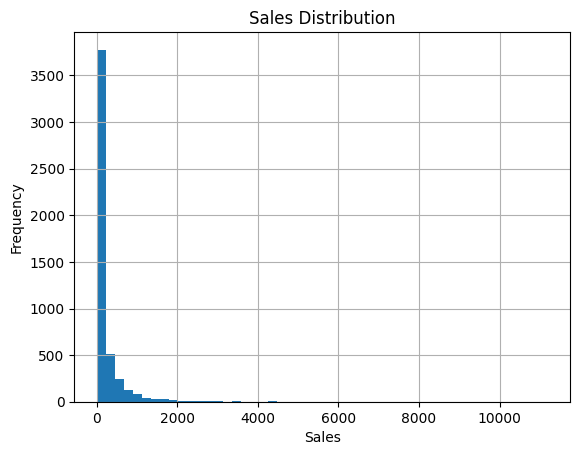

In [11]:
# Descriptive statistics for Sales
print(data['Sales'].describe())

# Optional: Quickly check the distribution of Sales
import matplotlib.pyplot as plt

data['Sales'].hist(bins=50)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Sales Distribution')
plt.show()


In [12]:
data.to_csv('cleaned_sales_data.csv', index=False)

In [13]:
import os
print(os.listdir('/kaggle/working'))

['__notebook__.ipynb', 'cleaned_sales_data.csv']


In [14]:
# Load CSV file from Kaggle working directory
cleaned_data = pd.read_csv('/kaggle/working/cleaned_sales_data.csv')

# Display first few rows
cleaned_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
2,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
3,6,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600
4,13,CA-2018-114412,2018-04-15,2018-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,28027.0,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.5520


In [15]:
import pandas as pd

# Load both CSV files
cleaned_sales_data = pd.read_csv('/kaggle/working/cleaned_sales_data.csv')
train_data = pd.read_csv('/kaggle/input/sales-forecasting/train.csv')

# Display basic information about each dataset to compare
cleaned_info = {
    "Shape": cleaned_sales_data.shape,
    "Columns": cleaned_sales_data.columns.tolist(),
    "Missing Values": cleaned_sales_data.isnull().sum().to_dict()
}

train_info = {
    "Shape": train_data.shape,
    "Columns": train_data.columns.tolist(),
    "Missing Values": train_data.isnull().sum().to_dict()
}

cleaned_info, train_info


({'Shape': (4916, 18),
  'Columns': ['Row ID',
   'Order ID',
   'Order Date',
   'Ship Date',
   'Ship Mode',
   'Customer ID',
   'Customer Name',
   'Segment',
   'Country',
   'City',
   'State',
   'Postal Code',
   'Region',
   'Product ID',
   'Category',
   'Sub-Category',
   'Product Name',
   'Sales'],
  'Missing Values': {'Row ID': 0,
   'Order ID': 0,
   'Order Date': 0,
   'Ship Date': 0,
   'Ship Mode': 0,
   'Customer ID': 0,
   'Customer Name': 0,
   'Segment': 0,
   'Country': 0,
   'City': 0,
   'State': 0,
   'Postal Code': 0,
   'Region': 0,
   'Product ID': 0,
   'Category': 0,
   'Sub-Category': 0,
   'Product Name': 0,
   'Sales': 0}},
 {'Shape': (9800, 18),
  'Columns': ['Row ID',
   'Order ID',
   'Order Date',
   'Ship Date',
   'Ship Mode',
   'Customer ID',
   'Customer Name',
   'Segment',
   'Country',
   'City',
   'State',
   'Postal Code',
   'Region',
   'Product ID',
   'Category',
   'Sub-Category',
   'Product Name',
   'Sales'],
  'Missing Values':